In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime, timedelta


#### get data 2022

In [2]:
data_202202=pd.read_csv('/mnt/GSHD_DATA_01/partner/icool/icools/data/DT_20220218_20220228.csv', sep=',')

In [3]:
data_202202.head(3)

name                                    id        date  cuahang_id         sum       total      mon  customer      bill  vat  phuphi  male  female  num_of_bill  complain      chiphi        goods  returns  customer_info  hour_per_bill  hours  tour  expense  room       profit created_by created_date modified_by  modified_date  trangthai
0  ICOOL B�nh Ph�  E02AF137-DC90-EC11-8111-509A4C8C9FAC  18/02/2022           6  66101800.0  64627610.0   975000     80540  418650.0  0.0  522000   196     170           43         3  9421428.57  12091922.74      0.0              5            3.0    150  1.79        0    24  43636258.69     system      00:05.7      system            NaN          4
1  ICOOL B�nh Ph�  D9379B62-A591-EC11-8111-509A4C8C9FAC  19/02/2022           6  92084600.0  90781870.0   752360     85950  464420.0  0.0       0   257     189           56         1  9421428.57  18119807.02      0.0             10            3.0    210  2.33        0    24  63240634.41     system      00:06.2      system            NaN          4
2  ICOOL B�nh Ph�  C2574C8D-6E92-EC11-8111-509A4C8C9FAC  20/02/2022           6  65674400.0  64383865.0  1235000     55535       0.0  0.0       0   190     142           42         1  9421428.57  12649355.46      0.0              5            5.0    210  1.75        0    24  42313080.97     system      00:06.6      system            NaN          4

In [4]:
data_202202=data_202202[['date', 'cuahang_id', 'total']]
data_202202['date'] =  pd.to_datetime(data_202202['date'], format='%d/%m/%Y')


In [5]:
for i in data_202202.index:
    data_202202.loc[i, 'total']=round(data_202202.loc[i, 'total']/1000000, 2)


In [6]:
# chx=data_202202[data_202202['cuahang_id']==24]


In [7]:
# chx.head()

In [8]:
data_before_20220217=pd.read_csv('/mnt/GSHD_DATA_01/partner/icool/icools/data/export_data_2017_20220217.csv')

In [9]:
data_before_20220217.head()

ngay                tencuahang  macuahang  doanhthu
0  2017-07-25      ICOOL Ung V?n KhiÃªm          1     82.37
1  2017-07-25        ICOOL ThÃ nh ThÃ¡i         10      9.56
2  2017-07-25        AAPPLE HoÃ ng Vi?t          2      5.80
3  2017-07-25  ICOOL XÃ´ Vi?t Ngh? T?nh          4     60.42
4  2017-07-25             ICOOL TÃ´ KÃ½          5     41.04

In [10]:
data_before_20220217=data_before_20220217[['ngay', 'macuahang', 'doanhthu']]
data_before_20220217.columns=['date', 'cuahang_id',	'total']

In [11]:
data_before_20220217['date'] =  pd.to_datetime(data_before_20220217['date'], format='%Y-%m-%d')

In [12]:
data_before_20220217.head()

date  cuahang_id  total
0 2017-07-25           1  82.37
1 2017-07-25          10   9.56
2 2017-07-25           2   5.80
3 2017-07-25           4  60.42
4 2017-07-25           5  41.04

In [13]:
data_all=pd.concat([data_before_20220217, data_202202])

In [14]:
data=pd.read_csv('data/DT_20210101_20211231.csv', sep='\t', encoding='latin-1')

In [15]:
data.head(3)

name                                    id        date  cuahang_id          sum        total        mon  customer       bill       vat  phuphi  male  female  num_of_bill  complain       chiphi        goods      returns  customer_info  hour_per_bill  hours  tour  expense  room       profit created_by created_date modified_by  modified_date  trangthai
0  ICOOL Ung V?n Khiêm  35360D09-544C-EB11-80FC-509A4C8C9FAC  01/01/2021           1  133260100.0  130995360.0  1601855.0  147515.0   515370.0       0.0       0   410     211           81         1  25600000.01  37121002.37  11424582.00             50            4.0    350  2.31        0    35  79698939.62     system      08:58.8      system            NaN          4
1     ICOOL Thành Thái  5B577AC1-534C-EB11-80FC-509A4C8C9FAC  01/01/2021          10   77961600.0   75168090.0  1069480.0  151200.0  1572830.0  494838.0       0   217     155           59         6  20213348.39  15139187.40  12119435.05             30            0.0      1  2.11        0    28  52429827.26     system      06:58.7      system            NaN          4
2    ICOOL Nguy?n Trãi  DAB10568-534C-EB11-80FC-509A4C8C9FAC  01/01/2021          11   41293000.0   39061845.0  1913300.0   66445.0   251410.0       0.0       0    85     120           34         2   6587311.84  18755490.95  10991668.00              6            4.0    160  2.13        0    16  24710710.21     system      04:28.6      system            NaN          4

In [16]:
data['tbbill']=round(data['total']/data['num_of_bill']/1000000,2)

In [17]:
data.head(2)

name                                    id        date  cuahang_id          sum        total        mon  customer       bill       vat  phuphi  male  female  num_of_bill  complain       chiphi        goods      returns  customer_info  hour_per_bill  hours  tour  expense  room       profit created_by created_date modified_by  modified_date  trangthai  tbbill
0  ICOOL Ung V?n Khiêm  35360D09-544C-EB11-80FC-509A4C8C9FAC  01/01/2021           1  133260100.0  130995360.0  1601855.0  147515.0   515370.0       0.0       0   410     211           81         1  25600000.01  37121002.37  11424582.00             50            4.0    350  2.31        0    35  79698939.62     system      08:58.8      system            NaN          4    1.62
1     ICOOL Thành Thái  5B577AC1-534C-EB11-80FC-509A4C8C9FAC  01/01/2021          10   77961600.0   75168090.0  1069480.0  151200.0  1572830.0  494838.0       0   217     155           59         6  20213348.39  15139187.40  12119435.05             30            0.0      1  2.11        0    28  52429827.26     system      06:58.7      system            NaN          4    1.27

In [18]:
set(data['room'])

{14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 28, 29, 35, 36, 37}

#### so phong: room
#### tua phong = so bill / so phong

In [19]:
# data_02[data_02.date > "2022-02-10"]

In [20]:
myDict={'Ung Văn Khiêm': 1, 
        'Xô Viết Nghệ Tĩnh': 4,
        'Tô Ký': 5,
        'Bình Phú': 6,
        'Dương Bá Trạc': 7,
        'Nguyễn Sơn': 9,
        'Thành Thái': 10,
        'Nguyễn Trãi': 11,
        'Mạc Đĩnh Chi': 12,
        'Trần Bình Trọng': 13,
        'CMT8': 14,
        'Cầu Chữ Y': 16,
        'Nhị Thiên Đường': 17,
        'Trần Não': 18,
        'Nguyễn Tri Phương': 19,
        'Đồng Đen': 22,
        'Phan Chu Trinh': 23,
        'Phan Xích Long': 24,
        'Vũng Tàu': 25,
        'Phú Quốc': 26}



In [21]:
data_02=data[['date', 'cuahang_id', 'total']]
data_02['total']=round(data_02['total']/1000000, 2)

In [22]:
data_02.head()

date  cuahang_id   total
0  01/01/2021           1  131.00
1  01/01/2021          10   75.17
2  01/01/2021          11   39.06
3  01/01/2021          12   66.30
4  01/01/2021          13   50.43

In [181]:
data_02['date'] =  pd.to_datetime(data_02['date'], format='%d/%m/%Y')


In [182]:
data_02.head()

date  cuahang_id  total
0 2017-07-25           1  82.37
1 2017-07-25          10   9.56
2 2017-07-25           2   5.80
3 2017-07-25           4  60.42
4 2017-07-25           5  41.04

In [183]:
date=data_02.loc[0,'date']

In [184]:
data_02=data_all.copy()
data_02=data_02[data_02['total']>5]
data_02 = data_02.reset_index(drop=True)
data_02.head()

date  cuahang_id  total
0 2017-07-25           1  82.37
1 2017-07-25          10   9.56
2 2017-07-25           2   5.80
3 2017-07-25           4  60.42
4 2017-07-25           5  41.04

#### 1. add feature current: date, month, year

In [185]:
# data_02.loc[i,'date']

In [186]:
data_02=data_02[data_02['cuahang_id']==25]

In [187]:
data_02.shape

(148, 3)

In [188]:
## M T W T F S S
## 1 2 3 4 5 6 7 
week_days=[]
days_of_month=[]
month_of_year=[]
current_year=[]
for i in data_02.index:
    date=data_02.loc[i,'date']
    week_days.append(date.weekday()+2)
    days_of_month.append(date.day)
    month_of_year.append(date.month)
    current_year.append(date.year)



In [189]:
data_02['week_days']=week_days
data_02['days_of_month']=days_of_month
data_02['month_of_year']=month_of_year
data_02['current_year']=current_year

In [190]:
data_02.head()

date  cuahang_id  total  week_days  days_of_month  month_of_year  current_year
18248 2021-01-13          25   8.65          4             13              1          2021
18265 2021-01-14          25   6.00          5             14              1          2021
18293 2021-01-15          25   7.00          6             15              1          2021
18313 2021-01-16          25  14.81          7             16              1          2021
18330 2021-01-17          25   5.14          8             17              1          2021

#### 2. add feature price of yesterday, 2 days, 3 days, 4 days, 5 days, 6 days, 7 days, ..., 14 days, last month

In [191]:
# data_02_CH01=data_02[data_02.cuahang_id==1]
data_02_CH01=data_02.copy()

In [192]:
data_02_CH01.head()

date  cuahang_id  total  week_days  days_of_month  month_of_year  current_year
18248 2021-01-13          25   8.65          4             13              1          2021
18265 2021-01-14          25   6.00          5             14              1          2021
18293 2021-01-15          25   7.00          6             15              1          2021
18313 2021-01-16          25  14.81          7             16              1          2021
18330 2021-01-17          25   5.14          8             17              1          2021

In [193]:
data_02_CH01.shape

(148, 7)

In [194]:
## M T W T F S S
## 2 3 4 5 6 7 8

## price 1 day
def get_history_price(nday):
    ## get price of history nday
    yesterday=date-timedelta(nday)
    tmp=data_02_CH01[(data_02_CH01['current_year']==yesterday.year) & (data_02_CH01['month_of_year']==yesterday.month) & (data_02_CH01['days_of_month']==yesterday.day)]
    if tmp.shape[0]!=0:
        return tmp['total'].tolist()[0]
    else:
        for x in range(1,100):
            
            new_date=date-timedelta(7*x)
            tmp=data_02_CH01[(data_02_CH01['current_year']==yesterday.year) & (data_02_CH01['month_of_year']==new_date.month) & (data_02_CH01['days_of_month']==new_date.day)]
            if tmp.shape[0]!=0:
                return tmp['total'].tolist()[0]
        return 0

containers=[]
for i in data_02_CH01.index:
    date=data_02_CH01.loc[i,'date']
    result={}
    current_date=str(date).replace(' 00:00:00', '')
    result['date']=current_date
    result['price_1day']=get_history_price(1)
    result['price_2day']=get_history_price(2)
    result['price_3day']=get_history_price(3)
    result['price_4day']=get_history_price(4)
    result['price_5day']=get_history_price(5)
    result['price_6day']=get_history_price(6)
    result['price_7day']=get_history_price(7)
    result['price_2w']=get_history_price(14)
    result['price_3w']=get_history_price(21)

    containers.append(result)


In [195]:
data_03=pd.DataFrame(containers)

In [196]:
data_03.head(3)

date  price_1day  price_2day  price_3day  price_4day  price_5day  price_6day  price_7day  price_2w  price_3w
0  2021-01-13       23.06       23.06       23.06       23.06       23.06       23.06       23.06      0.00       0.0
1  2021-01-14        8.65       14.48       14.48       14.48       14.48       14.48       14.48      0.00       0.0
2  2021-01-15        6.00        8.65       16.83       16.83       16.83       16.83       16.83     16.83       0.0

In [197]:
data_03.tail()

date  price_1day  price_2day  price_3day  price_4day  price_5day  price_6day  price_7day  price_2w  price_3w
143  2022-02-23        9.68       14.32        8.89       56.33       17.32       12.40        5.93     18.83     17.25
144  2022-02-24       16.03        9.68       14.32        8.89       56.33       17.32       12.40     12.40     14.00
145  2022-02-25       13.93       16.03        9.68       14.32        8.89       56.33       17.32     13.13     16.67
146  2022-02-26       18.04       13.93       16.03        9.68       14.32        8.89       56.33     52.27     29.63
147  2022-02-27       47.09       18.04       13.93       16.03        9.68       14.32        8.89      9.68     15.84

In [198]:
data_03['date'] =  pd.to_datetime(data_03['date'], format='%Y-%m-%d')


In [199]:
data_04 = pd.merge(data_02_CH01, data_03,
                        how="left", on=["date"])

In [200]:
data_04.tail(3)

date  cuahang_id  total  week_days  days_of_month  month_of_year  current_year  price_1day  price_2day  price_3day  price_4day  price_5day  price_6day  price_7day  price_2w  price_3w
145 2022-02-25          25  18.04          6             25              2          2022       13.93       16.03        9.68       14.32        8.89       56.33       17.32     13.13     16.67
146 2022-02-26          25  47.09          7             26              2          2022       18.04       13.93       16.03        9.68       14.32        8.89       56.33     52.27     29.63
147 2022-02-27          25  13.76          8             27              2          2022       47.09       18.04       13.93       16.03        9.68       14.32        8.89      9.68     15.84

In [201]:
data_04.columns

Index(['date', 'cuahang_id', 'total', 'week_days', 'days_of_month', 'month_of_year', 'current_year', 'price_1day', 'price_2day', 'price_3day', 'price_4day', 'price_5day', 'price_6day', 'price_7day', 'price_2w', 'price_3w'], dtype='object')

In [202]:
data_041=data_04[['date', 'total', 'week_days', 'days_of_month', 'month_of_year', 'current_year', 'price_1day', 
    'price_2day', 'price_3day', 'price_4day', 'price_5day', 'price_6day', 'price_7day', 'price_2w', 'price_3w']]

data_041.head()

date  total  week_days  days_of_month  month_of_year  current_year  price_1day  price_2day  price_3day  price_4day  price_5day  price_6day  price_7day  price_2w  price_3w
0 2021-01-13   8.65          4             13              1          2021       23.06       23.06       23.06       23.06       23.06       23.06       23.06      0.00       0.0
1 2021-01-14   6.00          5             14              1          2021        8.65       14.48       14.48       14.48       14.48       14.48       14.48      0.00       0.0
2 2021-01-15   7.00          6             15              1          2021        6.00        8.65       16.83       16.83       16.83       16.83       16.83     16.83       0.0
3 2021-01-16  14.81          7             16              1          2021        7.00        6.00        8.65       18.00       18.00       18.00       18.00     18.00       0.0
4 2021-01-17   5.14          8             17              1          2021       14.81        7.00        6.00        8.65        6.17        6.17        6.17      6.17       0.0

In [203]:
data_042=data_041[['week_days', 'days_of_month', 'month_of_year', 'current_year', 'price_1day', 
    'price_2day', 'price_3day', 'price_4day', 'price_5day', 'price_6day', 'price_7day', 'price_2w', 'price_3w']]


In [204]:
data_05X=data_042.to_numpy()

data_05X=data_04[['week_days', 'days_of_month', 'month_of_year', 'current_year']].to_numpy()
# need to add holidays, number room, price Dishes, price Hour

In [205]:
data_05X.shape

(148, 4)

In [206]:
data_05X[-1]

array([   8,   27,    2, 2022])

In [207]:
data_05Y=data_04['total'].to_numpy()

In [208]:
data_05Y[:3]

array([8.65, 6.  , 7.  ])

In [209]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(data_05X, data_05Y)
print(regr.predict([data_05X[-1]]))


[13.1482]


In [210]:
# !pip3 install sklearn

#### predict next n days

In [211]:
set(data_04['week_days'].tolist())

{2, 3, 4, 5, 6, 7, 8}

In [212]:
data_05Y[-1]

13.76

In [213]:
# from datetime import datetime

# ## predict from ndays
# start_date='2022-02-17'
# next_days=100

# first_date = datetime.fromisoformat(start_date)
# container=[]
# for i in range(next_days):
#     current=first_date+timedelta(i)
#     container.append({
#         # 'date': str(current).split()[0],
#         'date': current,
#         'week_days': current.weekday()+2,
#         'days_of_month': current.day,
#         'month_of_year': current.month,
#         'current_year': current.year,
#     })



In [278]:
from datetime import datetime

## predict from ndays
start_date='2022-02-01'
before_start_date=data_041[data_041['date']<start_date]

next_days=27

first_date = datetime.fromisoformat(start_date)
container=[]
for i in range(next_days):
    current=first_date+timedelta(i)

    ## date feature
    container.append({
        # 'date': str(current).split()[0],
        'date': current,
        'week_days': current.weekday()+2,
        'days_of_month': current.day,
        'month_of_year': current.month,
        'current_year': current.year, 
    })

    ## price feature
    ## now is 2021-01-07
    price_1day=get_history_price(1)
    # price_1day=regr.predict([x])



## M T W T F S S
## 2 3 4 5 6 7 8

## price 1 day
def get_history_price_inference(nday, first_date):
    ## get price of history nday
    yesterday=first_date-timedelta(nday)

    ## if nday=1, predict
    tmp=before_start_date[before_start_date['date']==yesterday]
    if tmp.shape[0]!=0:
        return tmp['total'].tolist()[0]
    else:
        for x in range(1,100):
            
            new_date=date-timedelta(7*x)
            tmp=before_start_date[(before_start_date['current_year']==yesterday.year) & \
                (before_start_date['month_of_year']==new_date.month) & (before_start_date['days_of_month']==new_date.day)]
                
            if tmp.shape[0]!=0:
                return tmp['total'].tolist()[0]
        return 0

In [279]:
# get_history_price_inference(1, first_date)

In [280]:
# before_start_date

In [281]:
predict_tmp=pd.DataFrame(container)

In [282]:
predict_tmp.head()


date  week_days  days_of_month  month_of_year  current_year
0 2022-02-01          3              1              2          2022
1 2022-02-02          4              2              2          2022
2 2022-02-03          5              3              2          2022
3 2022-02-04          6              4              2          2022
4 2022-02-05          7              5              2          2022

In [283]:
predict_tmp_array=predict_tmp[['week_days', 'days_of_month', 'month_of_year', 'current_year']].to_numpy()


In [284]:
predict_tmp_array.shape

(27, 4)

In [285]:
predict_val=[regr.predict([x]) for x in predict_tmp_array]
predict_val=[x[0] for x in predict_val]


In [286]:
# predict_val[:4]

In [287]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(predict_val, data_05Y[-next_days:], squared=False)

In [288]:
rmse

5.446973740323873

In [289]:
predict_tmp['predict']=predict_val
predict_tmp['gt']=data_05Y[-next_days:]

In [290]:
predict_tmp.head()

date  week_days  days_of_month  month_of_year  current_year  predict     gt
0 2022-02-01          3              1              2          2022  11.9829   5.14
1 2022-02-02          4              2              2          2022  15.6991  10.58
2 2022-02-03          5              3              2          2022  14.0271  17.25
3 2022-02-04          6              4              2          2022  13.9108  14.00
4 2022-02-05          7              5              2          2022  33.8935  16.67

In [291]:
predict_tmp.tail()

date  week_days  days_of_month  month_of_year  current_year  predict     gt
22 2022-02-23          4             23              2          2022  13.4173  16.03
23 2022-02-24          5             24              2          2022  13.3790  13.93
24 2022-02-25          6             25              2          2022  16.7029  18.04
25 2022-02-26          7             26              2          2022  39.8647  47.09
26 2022-02-27          8             27              2          2022  13.1482  13.76

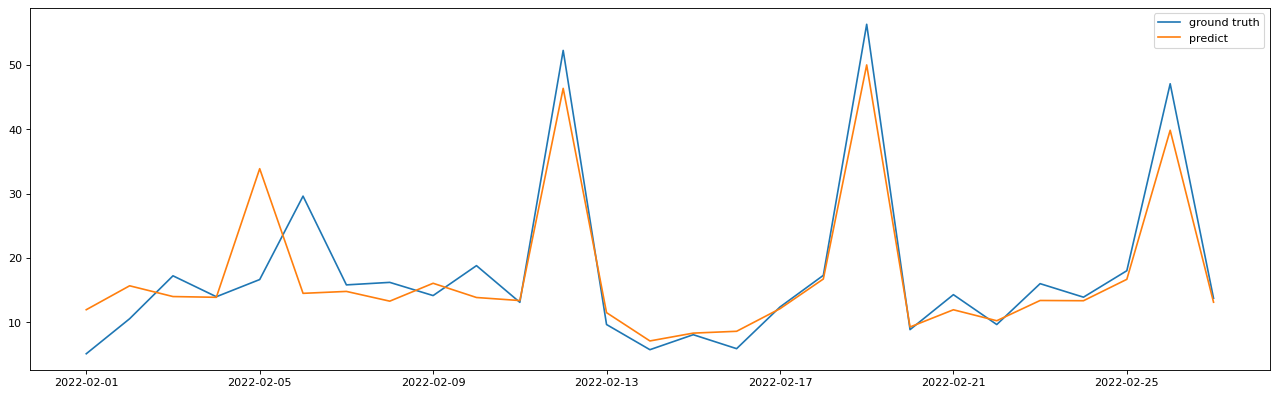

In [292]:
import matplotlib.pyplot as plt
import datetime
from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)

plt.plot(predict_tmp['date'],predict_tmp['gt'], label='ground truth')
plt.plot(predict_tmp['date'],predict_tmp['predict'], label='predict')
plt.legend()
plt.show()

#### rmspe

In [293]:
# rmspe = (np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))) * 100
import numpy as np

def mape_list(list_predict, list_gt):
    se=[]
    for n,e in enumerate(list_gt):
        try:
            e1 = abs(e - list_predict[n]) / e
            if e1>1:
                e1=1
            e1=1-e1

            se.append(e1)
            # print(e1)
        except:
            print(e)
    rmspe=np.mean(se)*100
    return rmspe

mape=mape_list(predict_tmp['predict'].tolist(), predict_tmp['gt'].tolist())
print(f'==> mape: {mape}')


==> mape: 78.57261832436967


In [294]:
## ch=24
# ==> mape: 78.66792637838216
## ch=25
# ==> mape: 87.66691750221918


